In [21]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth',80)

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

In [22]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
stopwords_eng = stopwords.words('english')

# Import Data

Dataset accessed from: https://github.com/PritamGuha31/Sentiment-Analysis-on-Twitter-data-ahead-of-2020-US-Elections/blob/main/tweets_election.csv

In [24]:
tweets_df = pd.read_csv('Data/tweets_election.csv')
tweets_df.drop(tweets_df.columns[0], axis=1, inplace=True)

In [25]:
tweets_df.head()

,geo,text,user,location,Subject,state
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off prote...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because th...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zucker...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [26]:
tweets_df.shape

(5553, 6)

# NLTK text preprocess

In [27]:
def clean_tweet(tweet):
    tweet = re.sub('RT','',tweet)
    tweet = re.sub('@','',tweet)
    tweet = re.sub('#','',tweet)
    tweet = re.sub('https?://[A-Za-z0-9./]*','',tweet)
    tweet = re.sub('\n','',tweet)
    return tweet

In [28]:
# lemmatization function
lemmatizer = WordNetLemmatizer()
def lemmatize_tweet(tweet):
    lemmatized_tweet = []
    for word in tweet:
        lemmatized_tweet.append(lemmatizer.lemmatize(word, pos='v'))
    return lemmatized_tweet

# stemming function
porter = PorterStemmer()
def stem_tweet(tweet):
    stemmed_tweet = []
    for word in tweet:
        stemmed_tweet.append(porter.stem(word))
    return stemmed_tweet


# remove stopwords function
def remove_stopwords(tweet):
    tweet_witout_stops = []
    for word in tweet:
        if word not in stopwords_eng:
            tweet_witout_stops.append(word)
    return tweet_witout_stops

In [29]:
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet)

In [30]:
# make all text lowercase
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].apply(lambda x: x.lower())

In [31]:
# remove punctuations and numbers and emoji
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].str.replace("[^a-zA-z]", " ")

<ipython-input-31-7b644cf159d7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['cleaned_text'] = tweets_df['cleaned_text'].str.replace("[^a-zA-z]", " ")


In [32]:
#tokenize text
tweets_df['tokenized_text'] = tweets_df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [33]:
#remove stopwords
tweets_df['tokenized_text'] = tweets_df['tokenized_text'].apply(remove_stopwords)

In [34]:
#lemmatize text
tweets_df['lemmatized_text'] = tweets_df['tokenized_text']. apply(lemmatize_tweet)

In [35]:
#stem text
tweets_df['stemmed_text'] = tweets_df['lemmatized_text'].apply(stem_tweet)

In [36]:
#de tokenize text
tweets_df['lemmatized_string'] = tweets_df['lemmatized_text'].apply(lambda x: ' '.join(x))
tweets_df['stemmed_string'] = tweets_df['stemmed_text'].apply(lambda x: ' '.join(x))

In [37]:
tweets_df.head()

,geo,text,user,location,Subject,state,cleaned_text,tokenized_text,lemmatized_text,stemmed_text,lemmatized_string,stemmed_string
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off prote...,wheresestela1,New Jersey,Donald Trump,New Jersey,after the confrontation that cost walter wallace jr his life set off prote...,"[confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...","[confrontation, cost, walter, wallace, jr, life, set, protest, devolve, riot...","[confront, cost, walter, wallac, jr, life, set, protest, devolv, riot, loot,...",confrontation cost walter wallace jr life set protest devolve riot loot lead,confront cost walter wallac jr life set protest devolv riot loot lead
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,covid is still raging trump is still lying,"[covid, still, raging, trump, still, lying]","[covid, still, rag, trump, still, lie]","[covid, still, rag, trump, still, lie]",covid still rag trump still lie,covid still rag trump still lie
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because th...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,donald trump jr why aren t they talking about deaths oh oh because th...,"[donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, death, oh, oh, number, almost, noth, gott]",donald trump jr talk deaths oh oh number almost nothing gott,donald trump jr talk death oh oh number almost noth gott
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,let s not forget who created these problems tell donald trump his scheme to...,"[let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...","[let, forget, create, problems, tell, donald, trump, scheme, undermine, righ...","[let, forget, creat, problem, tell, donald, trump, scheme, undermin, right, ...",let forget create problems tell donald trump scheme undermine right vote safely,let forget creat problem tell donald trump scheme undermin right vote safe
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zucker...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,there is no greater supporter of donald trump in the world than mark zucker...,"[greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]","[greater, supporter, donald, trump, world, mark, zuckerberg, one, do, elect]","[greater, support, donald, trump, world, mark, zuckerberg, one, do, elect]",greater supporter donald trump world mark zuckerberg one do elect,greater support donald trump world mark zuckerberg one do elect


In [38]:
trump_mentions = len(tweets_df[tweets_df['Subject'] == 'Donald Trump'])
print(f'Donald Trump mentions: {trump_mentions}')

biden_mentions = len(tweets_df[tweets_df['Subject'] == 'Joe Biden'])
print(f'Joe Biden mentions: {biden_mentions}')

Donald Trump mentions: 2928
Joe Biden mentions: 2625


# NLTK sentiment Analysis

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
import re
import spacy
nlp = spacy.load('en_core_web_lg')

KeyboardInterrupt: 

In [ ]:
def clean_tweet(tweet):
    tweet = re.sub('RT @[\w]*:','',tweet)
    tweet = re.sub('@[\w]*','',tweet)
    tweet = re.sub("https?://[A-Za-z0-9./]*","",tweet)
    tweet = re.sub("\n","",tweet)
    tweet = str(tweet).lower()
    
    
    tweet = " ".join(str(token) for token in nlp(tweet) if str(token) not in nlp.Defaults.stop_words)
    tweet = " ".join(str(token.lemma_) for token in nlp(tweet) if not token.is_punct)
    return tweet

In [ ]:
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet)

In [9]:
tweets_df.head()

,geo,text,user,location,Subject,state,cleaned_text
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,confrontation cost walter wallace jr life s...
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,covid-19 rage trump lie
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,donald trump jr talk death oh oh number gott
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,let forget create problem tell donald trump sc...
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,great supporter donald trump world mark zuc...


In [9]:
clean_tweet("After the confrontation that cost Walter Wallace Jr. his life set off protests that devolved into rioting, looting")

'confrontation cost walter wallace jr life set protest devolve rioting loot'

In [39]:
sid = SentimentIntensityAnalyzer()

In [40]:
def tweet_polarity(tweet):
    return sid.polarity_scores(tweet)

In [41]:
#tweets_df['Polarity'] = tweets_df['Cleaned Tweet'].apply(tweet_polarity)
tweets_df['Polarity'] = tweets_df['stemmed_string'].apply(tweet_polarity)

In [42]:
#tweets_df.drop('Tweet', axis=1, inplace=True)

def sentimentVerdict(polarity):
    #print(polarity['compound'])
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [43]:
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentimentVerdict)

In [44]:
tweets_df

,geo,text,user,location,Subject,state,cleaned_text,tokenized_text,lemmatized_text,stemmed_text,lemmatized_string,stemmed_string,Polarity,Sentiment
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off prote...,wheresestela1,New Jersey,Donald Trump,New Jersey,after the confrontation that cost walter wallace jr his life set off prote...,"[confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...","[confrontation, cost, walter, wallace, jr, life, set, protest, devolve, riot...","[confront, cost, walter, wallac, jr, life, set, protest, devolv, riot, loot,...",confrontation cost walter wallace jr life set protest devolve riot loot lead,confront cost walter wallac jr life set protest devolv riot loot lead,"{'neg': 0.448, 'neu': 0.552, 'pos': 0.0, 'compound': -0.743}",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,covid is still raging trump is still lying,"[covid, still, raging, trump, still, lying]","[covid, still, rag, trump, still, lie]","[covid, still, rag, trump, still, lie]",covid still rag trump still lie,covid still rag trump still lie,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because th...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,donald trump jr why aren t they talking about deaths oh oh because th...,"[donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, death, oh, oh, number, almost, noth, gott]",donald trump jr talk deaths oh oh number almost nothing gott,donald trump jr talk death oh oh number almost noth gott,"{'neg': 0.275, 'neu': 0.634, 'pos': 0.092, 'compound': -0.5574}",Negative
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,let s not forget who created these problems tell donald trump his scheme to...,"[let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...","[let, forget, create, problems, tell, donald, trump, scheme, undermine, righ...","[let, forget, creat, problem, tell, donald, trump, scheme, undermin, right, ...",let forget create problems tell donald trump scheme undermine right vote safely,let forget creat problem tell donald trump scheme undermin right vote safe,"{'neg': 0.279, 'neu': 0.545, 'pos': 0.176, 'compound': -0.1779}",Negative
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zucker...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,there is no greater supporter of donald trump in the world than mark zucker...,"[greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]","[greater, supporter, donald, trump, world, mark, zuckerberg, one, do, elect]","[greater, support, donald, trump, world, mark, zuckerberg, one, do, elect]",greater supporter donald trump world mark zuckerberg one do elect,greater support donald trump world mark zuckerberg one do elect,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.6369}",Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5548,NaN,Donald Trump is just one big #COVID19 super spreader. Our nation needs heal...,karen_brioso,"Salem, OR",Joe Biden,Oregon,donald trump is just one big covid super spreader our nation needs heali...,"[donald, trump, one, big, covid, super, spreader, nation, needs, healing, on...","[donald, trump, one, big, covid, super, spreader, nation, need, heal, one, r...","[donald, trump, one, big, covid, super, spreader, nation, need, heal, one, r...",donald trump one big covid super spreader nation need heal one reason cast v...,donald trump one big covid super spreader nation need heal one reason cast v...,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.5994}",Positive
5549,NaN,Obama 

In [45]:
myindex = ['Donald Trump', 'Joe Biden']

In [46]:
mycolumns = ['Positive', 'Neutral', 'Negative']

In [47]:
sentimet_df = pd.DataFrame(index=myindex, columns=mycolumns)

In [48]:
positive_trump = tweets_df[(tweets_df['Subject'] == 'Donald Trump') & (tweets_df['Sentiment'] == 'Positive')].count()['user']
neutral_trump = tweets_df[(tweets_df['Subject'] == 'Donald Trump') & (tweets_df['Sentiment'] == 'Neutral')].count()['user']
negative_trump = tweets_df[(tweets_df['Subject'] == 'Donald Trump') & (tweets_df['Sentiment'] == 'Negative')].count()['user']

positive_biden = tweets_df[(tweets_df['Subject'] == 'Joe Biden') & (tweets_df['Sentiment'] == 'Positive')].count()['user']
neutral_biden = tweets_df[(tweets_df['Subject'] == 'Joe Biden') & (tweets_df['Sentiment'] == 'Neutral')].count()['user']
negative_biden = tweets_df[(tweets_df['Subject'] == 'Joe Biden') & (tweets_df['Sentiment'] == 'Negative')].count()['user']

In [49]:
sentimet_df.at['Donald Trump', 'Positive'] = positive_trump
sentimet_df.at['Donald Trump', 'Neutral'] = neutral_trump
sentimet_df.at['Donald Trump', 'Negative'] = negative_trump

sentimet_df.at['Joe Biden', 'Positive'] = positive_biden
sentimet_df.at['Joe Biden', 'Neutral'] = neutral_biden
sentimet_df.at['Joe Biden', 'Negative'] = negative_biden

sentimet_df

,Positive,Neutral,Negative
Donald Trump,835,924,1169
Joe Biden,712,1105,808


In [50]:
len(tweets_df)

5553

# Visualizations

In [51]:
tweets_df.head()

,geo,text,user,location,Subject,state,cleaned_text,tokenized_text,lemmatized_text,stemmed_text,lemmatized_string,stemmed_string,Polarity,Sentiment
0,NaN,After the confrontation that cost Walter Wallace Jr. his life set off prote...,wheresestela1,New Jersey,Donald Trump,New Jersey,after the confrontation that cost walter wallace jr his life set off prote...,"[confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...","[confrontation, cost, walter, wallace, jr, life, set, protest, devolve, riot...","[confront, cost, walter, wallac, jr, life, set, protest, devolv, riot, loot,...",confrontation cost walter wallace jr life set protest devolve riot loot lead,confront cost walter wallac jr life set protest devolv riot loot lead,"{'neg': 0.448, 'neu': 0.552, 'pos': 0.0, 'compound': -0.743}",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lying.""",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,covid is still raging trump is still lying,"[covid, still, raging, trump, still, lying]","[covid, still, rag, trump, still, lie]","[covid, still, rag, trump, still, lie]",covid still rag trump still lie,covid still rag trump still lie,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
2,NaN,"Donald Trump Jr.: ""Why aren't they talking about deaths? Oh, oh, because th...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,donald trump jr why aren t they talking about deaths oh oh because th...,"[donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, deaths, oh, oh, number, almost, nothing, gott]","[donald, trump, jr, talk, death, oh, oh, number, almost, noth, gott]",donald trump jr talk deaths oh oh number almost nothing gott,donald trump jr talk death oh oh number almost noth gott,"{'neg': 0.275, 'neu': 0.634, 'pos': 0.092, 'compound': -0.5574}",Negative
3,NaN,Let’s not forget who created these problems. Tell Donald Trump his scheme to...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,let s not forget who created these problems tell donald trump his scheme to...,"[let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...","[let, forget, create, problems, tell, donald, trump, scheme, undermine, righ...","[let, forget, creat, problem, tell, donald, trump, scheme, undermin, right, ...",let forget create problems tell donald trump scheme undermine right vote safely,let forget creat problem tell donald trump scheme undermin right vote safe,"{'neg': 0.279, 'neu': 0.545, 'pos': 0.176, 'compound': -0.1779}",Negative
4,NaN,There is no greater supporter of Donald Trump in the world than Mark Zucker...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,there is no greater supporter of donald trump in the world than mark zucker...,"[greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]","[greater, supporter, donald, trump, world, mark, zuckerberg, one, do, elect]","[greater, support, donald, trump, world, mark, zuckerberg, one, do, elect]",greater supporter donald trump world mark zuckerberg one do elect,greater support donald trump world mark zuckerberg one do elect,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.6369}",Positive


Text(0.5, 0.98, 'Sentiments for each candidate')

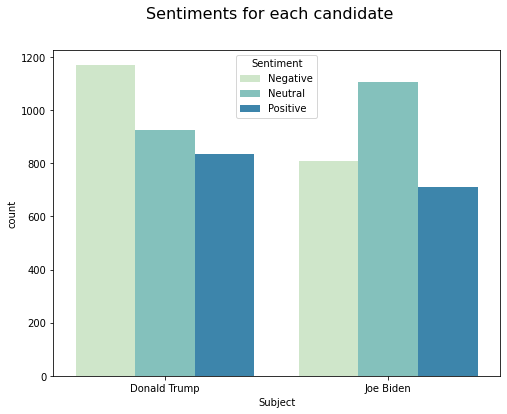

In [52]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Subject',hue='Sentiment', data=tweets_df, palette='GnBu')
fig.suptitle('Sentiments for each candidate', fontsize=16)

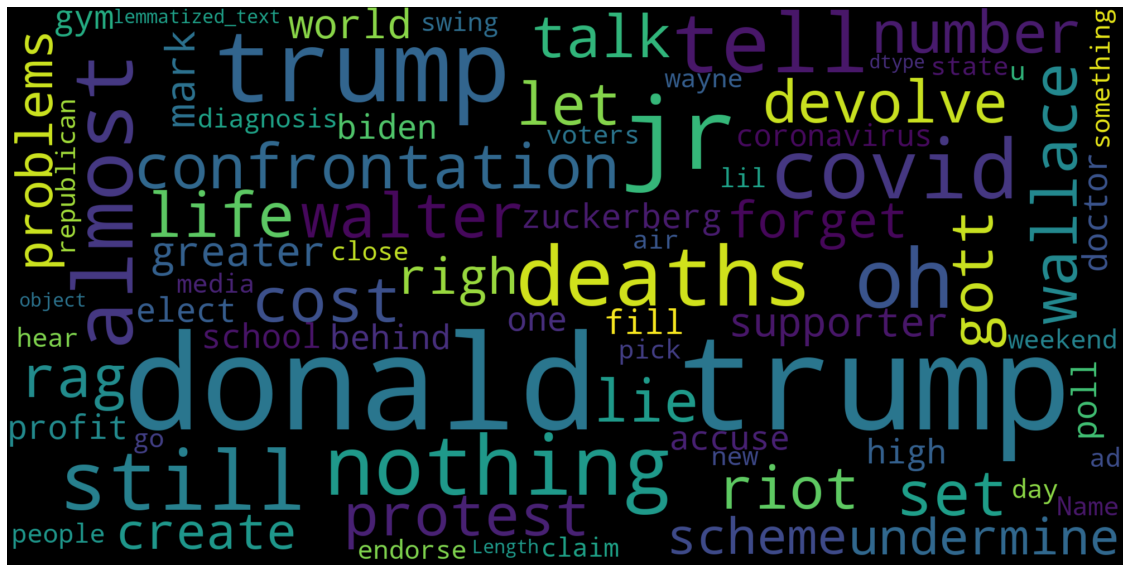

In [53]:
df = tweets_df[tweets_df['Subject'] == 'Donald Trump']
words = df.lemmatized_text
wordcloud = WordCloud(width=2000, height=1000, stopwords=stopwords_eng).generate(str(words))

fig = plt.figure(figsize=(20,20))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

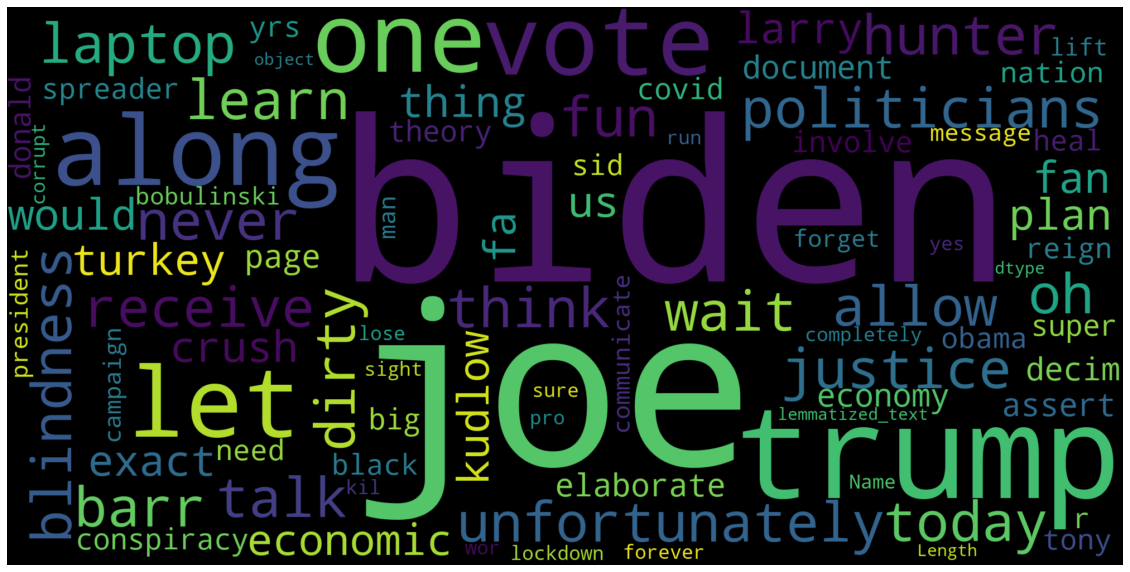

In [54]:
df = tweets_df[tweets_df['Subject'] == 'Joe Biden']
words = df.lemmatized_text
wordcloud = WordCloud(width=2000, height=1000, stopwords=stopwords_eng).generate(str(words))

fig = plt.figure(figsize=(20,20))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Estimations of elections results

A formula developed by using the approach suggested by Wicaksono et al. According to
Wicaksono et al, a positive tweet about a candidate indicates the intention to vote for that
candidate, and a negative tweet indicates the intention to vote for an opposition candidate. Using this
approach, as the third alternative method, vote share prediction is formulated as follow:
(𝑣𝑜𝑡𝑒 𝑠ℎ𝑎𝑟𝑒 𝑜𝑓 𝑝𝑎𝑟𝑡𝑦 (𝐴))% =
[𝑝𝑜𝑠(𝐴) + 𝑛𝑒𝑔(𝐵)] /
[𝑇(𝐴) + 𝑇(𝐵)]

https://arxiv.org/ftp/arxiv/papers/2010/2010.15938.pdf


In [55]:
labels = list(sentimet_df.index)
labels.append('Others')
percentage_trump = round(((positive_trump + negative_biden)/len(tweets_df))*100, 2)
percentage_biden = round(((positive_biden + negative_trump)/len(tweets_df))*100, 2)
percentage_others = round(100 - percentage_biden - percentage_trump, 2)
data = [percentage_trump, percentage_biden, percentage_others]

In [56]:
labels

['Donald Trump', 'Joe Biden', 'Others']

Text(0.5, 0.98, 'Election estimations')

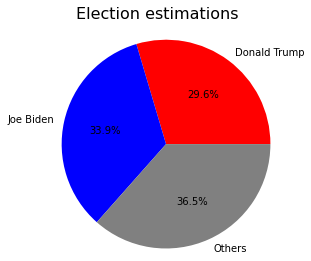

In [57]:
fig, axes = plt.subplots(figsize=(10,4))
axes.pie(data, labels=labels, autopct='%1.1f%%',radius=1.2,colors=['red','blue','gray'])
fig.suptitle("Election estimations",fontsize=16)

# Predictions for each state

In [72]:
df = pd.DataFrame({'Total tweets for each state':tweets_df['state'].value_counts()})

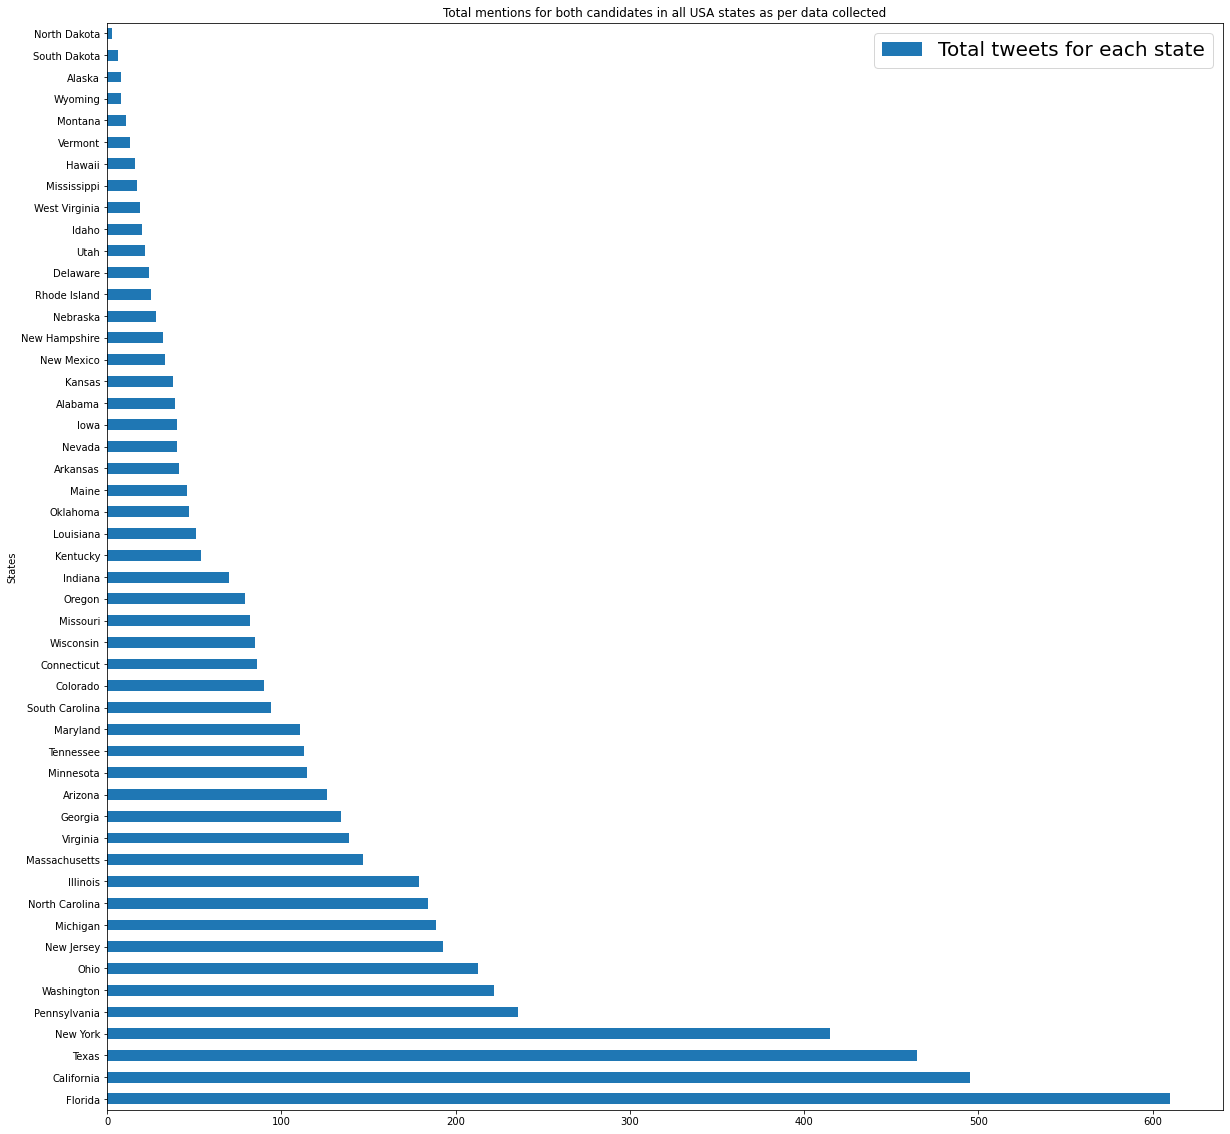

In [73]:
ax = df.plot(kind='barh', figsize=(20,20))
ax.legend(prop = {'size':20})
ax.set_title("Total mentions for both candidates in all USA states as per data collected")
ax.set_ylabel('States')
ax.figure.savefig('Plots/total_tweets.png')

In [74]:
tweets_trump = tweets_df[tweets_df['Subject'] == 'Donald Trump']
tweets_biden = tweets_df[tweets_df['Subject'] == 'Joe Biden']

In [75]:
df = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(),right_index=True, left_index=True)
df = df.rename(columns={'state_x': "Total Trump mentions", 'state_y': "Total Biden mentions"})

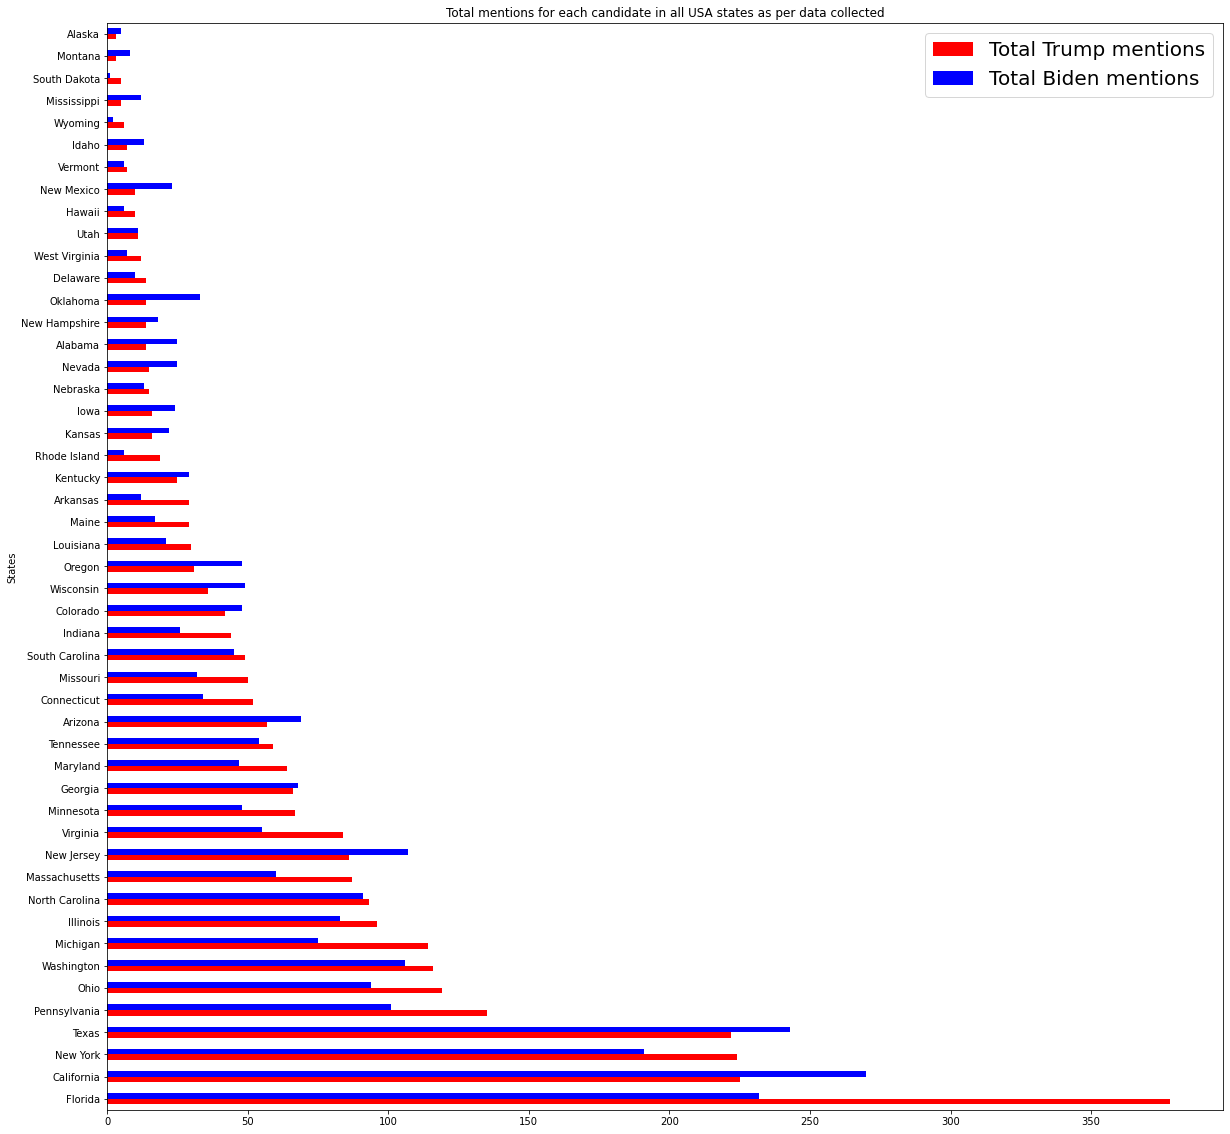

In [76]:
ax = df.plot(kind='barh', figsize=(20,20), color={"Total Trump mentions":'red', "Total Biden mentions":'blue'})
ax.legend(prop = {'size':20})
ax.set_title("Total mentions for each candidate in all USA states as per data collected")
ax.set_ylabel('States')
ax.figure.savefig('Plots/total_mentions.png')

In [77]:
pos_trump = tweets_df[(tweets_df['Subject'] == 'Donald Trump') & (tweets_df['Sentiment'] == 'Positive')]['state'].value_counts()
pos_biden = tweets_df[(tweets_df['Subject'] == 'Joe Biden') & (tweets_df['Sentiment'] == 'Positive')]['state'].value_counts()

In [78]:
df = pd.merge(pos_trump, pos_biden, right_index=True, left_index=True)
df = df.rename(columns={'state_x': "Total positive Trump mentions", 'state_y': "Total positive Biden mentions"})

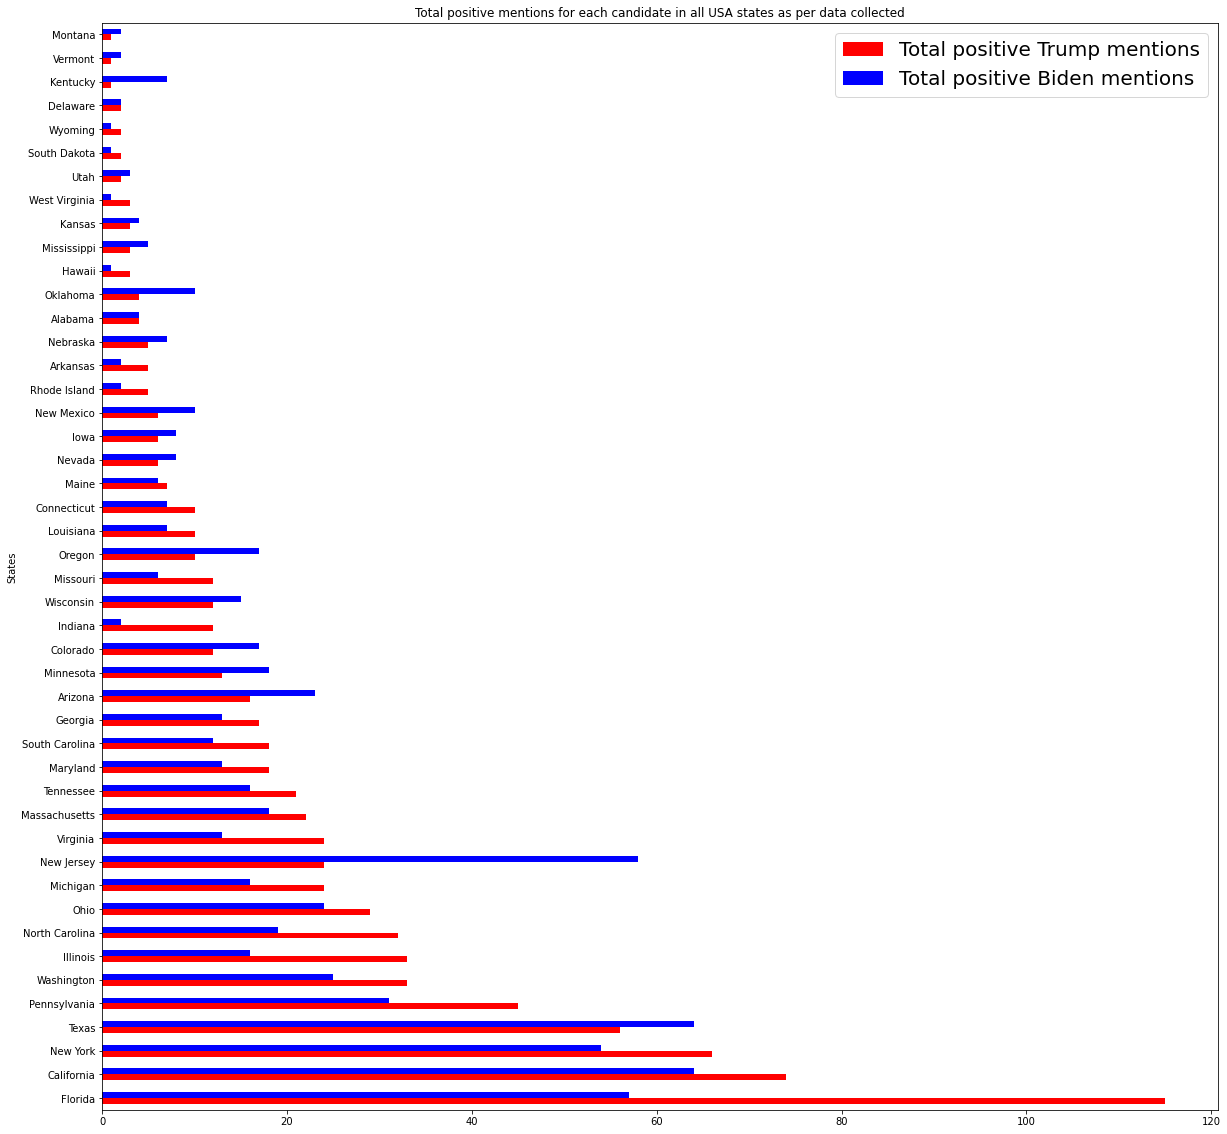

In [79]:
ax = df.plot(kind='barh', figsize=(20,20), color={"Total positive Trump mentions":'red', "Total positive Biden mentions":'blue'})
ax.legend(prop = {'size':20})
ax.set_title("Total positive mentions for each candidate in all USA states as per data collected")
ax.set_ylabel('States')
ax.figure.savefig('Plots/total_positive.png')

In [80]:
neg_trump = tweets_df[(tweets_df['Subject'] == 'Donald Trump') & (tweets_df['Sentiment'] == 'Negative')]['state'].value_counts()
neg_biden = tweets_df[(tweets_df['Subject'] == 'Joe Biden') & (tweets_df['Sentiment'] == 'Negative')]['state'].value_counts()

In [81]:
df = pd.merge(neg_trump, neg_biden, right_index=True, left_index=True)
df = df.rename(columns={'state_x': "Total negative Trump mentions", 'state_y': "Total negative Biden mentions"})

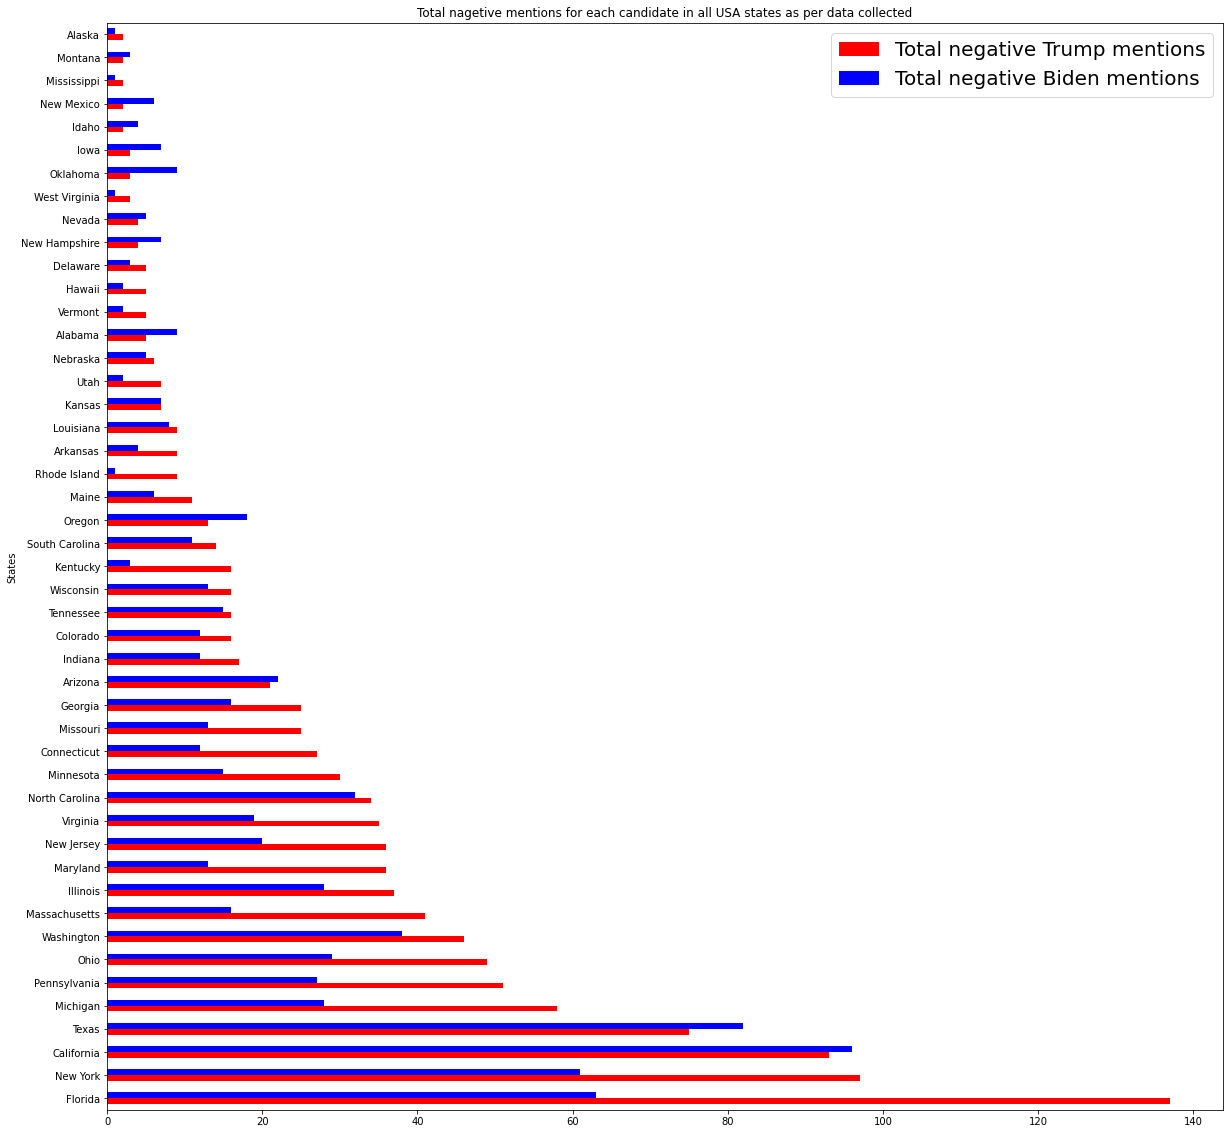

In [82]:
ax = df.plot(kind='barh', figsize=(20,20), color={"Total negative Trump mentions":'red', "Total negative Biden mentions":'blue'})
ax.legend(prop = {'size':20})
ax.set_title("Total nagetive mentions for each candidate in all USA states as per data collected")
ax.set_ylabel('States')
ax.figure.savefig('Plots/total_negative.png')

In [83]:
sentimet_df

,Positive,Neutral,Negative
Donald Trump,835,924,1169
Joe Biden,712,1105,808


# Text classification

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = tweets_df['cleaned_text']
y = tweets_df['Sentiment']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Decision Trees
text_clf_trees = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', DecisionTreeClassifier()),
])

# Naive Bayes

In [27]:
text_clf_nb.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
predictions = text_clf_nb.predict(X_test)

In [29]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89       692
     Neutral       0.88      0.77      0.82       449
    Positive       0.82      0.90      0.86       525

    accuracy                           0.86      1666
   macro avg       0.86      0.85      0.86      1666
weighted avg       0.86      0.86      0.86      1666



In [30]:
print(metrics.accuracy_score(y_test, predictions))

0.8613445378151261


In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [32]:
confusion_matrix

array([[615,  28,  49],
       [ 45, 346,  58],
       [ 31,  20, 474]], dtype=int64)

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

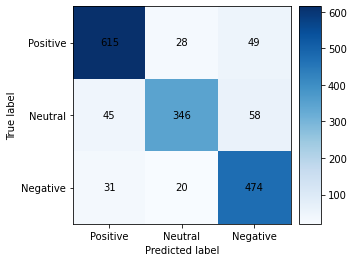

In [34]:
sent_list = ['Positive', 'Neutral', 'Negative']

fig, axes = plt.subplots()
im = axes.imshow(confusion_matrix, cmap='Blues')
axes_divider = make_axes_locatable(axes)

# Add an axes to the right of the main axes.
cax = axes_divider.append_axes("right", size="10%", pad="4%")

# We want to show all ticks...
axes.set_xticks(np.arange(len(confusion_matrix)))
axes.set_yticks(np.arange(len(confusion_matrix)))
# ... and label them with the respective list entries
axes.set_xticklabels(sent_list)
axes.set_yticklabels(sent_list)

# Set x,y label names
axes.set_xlabel('Predicted label')
axes.set_ylabel('True label')

# Loop over data dimensions and create text annotations.
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix)):
        axes.text(j, i, confusion_matrix[i,j], ha='center', va='center', color='black')

cb = fig.colorbar(im, cax=cax)

In [35]:
fig.savefig('naive-bayes.png')

In [36]:
len(confusion_matrix)

3

# Linear SCV

In [37]:
text_clf_lsvc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [38]:
predictions = text_clf_lsvc.predict(X_test)

In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.93      0.92      0.92       692
     Neutral       0.89      0.87      0.88       449
    Positive       0.89      0.92      0.90       525

    accuracy                           0.91      1666
   macro avg       0.90      0.90      0.90      1666
weighted avg       0.91      0.91      0.91      1666



In [40]:
print(metrics.accuracy_score(y_test, predictions))

0.9063625450180072


In [41]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

In [42]:
confusion_matrix

array([[637,  26,  29],
       [ 28, 389,  32],
       [ 21,  20, 484]], dtype=int64)

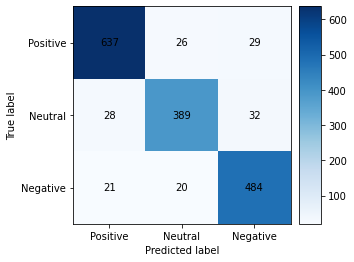

In [43]:
sent_list = ['Positive', 'Neutral', 'Negative']

fig, axes = plt.subplots()
im = axes.imshow(confusion_matrix, cmap='Blues')
axes_divider = make_axes_locatable(axes)

# Add an axes to the right of the main axes.
cax = axes_divider.append_axes("right", size="10%", pad="4%")

# We want to show all ticks...
axes.set_xticks(np.arange(len(confusion_matrix)))
axes.set_yticks(np.arange(len(confusion_matrix)))
# ... and label them with the respective list entries
axes.set_xticklabels(sent_list)
axes.set_yticklabels(sent_list)

# Set x,y label names
axes.set_xlabel('Predicted label')
axes.set_ylabel('True label')

# Loop over data dimensions and create text annotations.
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix)):
        axes.text(j, i, confusion_matrix[i,j], ha='center', va='center', color='black')

cb = fig.colorbar(im, cax=cax)

In [127]:
fig.savefig('svc.png')

In [42]:
import joblib

In [43]:
joblib.dump(text_clf_lsvc, 'sentiment_model.sav')

['sentiment_model.sav']